<h1> MFI, Money Inflow Index provides technial signal for entry and exit </h1>
0. Get instrument historical data <br>
1. Calculate the Typical Price for each of the last 14 periods. <br>
2. For each period, mark whether the typical price was higher or lower than the prior period. This will tell you whether Raw Money Flow is positive or negative <br>


In [6]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
stock = 'ABT'
df = web.DataReader(stock, data_source='yahoo', start='01-01-2020')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.959999,85.800003,86.059998,86.949997,4969000.0,85.885757
2020-01-03,86.669998,85.589996,85.750000,85.889999,4747000.0,84.838737
2020-01-06,86.360001,85.209999,85.620003,86.339996,5631700.0,85.283234
2020-01-07,86.300003,85.540001,85.769997,85.860001,3408100.0,84.809113
2020-01-08,86.660004,85.930000,86.239998,86.209999,5693900.0,85.154816
...,...,...,...,...,...,...
2020-10-05,108.650002,107.180000,107.180000,108.559998,3603400.0,108.559998
2020-10-06,108.769997,106.050003,108.559998,106.250000,3992600.0,106.250000
2020-10-07,108.180000,106.930000,107.370003,107.739998,4162400.0,107.739998


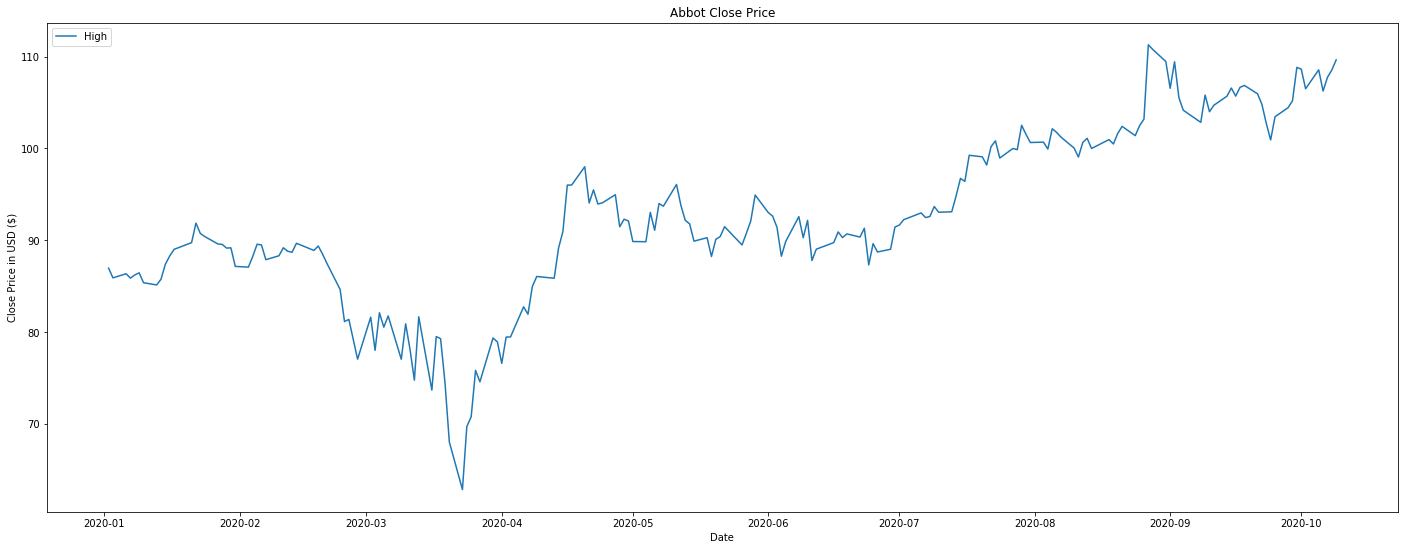

In [11]:
plt.figure(figsize=(24.2,9))
plt.plot(df['Close'], label = 'Closing Price')
plt.title('Abbot Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [12]:
# calculate typical price
typical_price = (df['Close'] + df['High'] + df['Low'])/3
typical_price

In [15]:
period = 14
money_flow = typical_price * df['Volume']
money_flow

Date
2020-01-02    4.301663e+08
2020-01-03    4.084793e+08
2020-01-06    4.841572e+08
2020-01-07    2.927558e+08
2020-01-08    4.911938e+08
                  ...     
2020-10-05    3.896356e+08
2020-10-06    4.273014e+08
2020-10-07    4.479436e+08
2020-10-08    4.517017e+08
2020-10-09    3.348132e+08
Length: 196, dtype: float64

In [25]:
# get Positive and Negative money flows
p_flow = []; n_flow=[]

for i in range(1, len(typical_price)):
    if   typical_price[i] > typical_price[i-1]:
        p_flow.append(money_flow[i-1])
        n_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        n_flow.append(money_flow[i-1])
        p_flow.append(0)
    else:
        n_flow.append(0)
        p_flow.append(0)



In [31]:
# accumulate positive and negative flows within the time period, current 14 days
p_mf=[];n_mf=[]

for i in range(period-1, len(p_flow)):
    p_mf.append( sum(p_flow[i+1-period : i+1]))
    n_mf.append( sum(n_flow[i+1-period : i+1]))

In [29]:
#calculate MFI
mfi = 100 * (np.array(p_mf) / (np.array(p_mf) + np.array(n_mf)))
mfi

array([56.35672804, 54.52848737, 54.71587472, 60.73350969, 55.63354611,
       50.08085865, 50.68862442, 49.8922536 , 49.44521605, 46.55221212,
       45.37062248, 39.25253771, 32.15698614, 28.99860084, 32.37205202,
       34.63814791, 41.94257952, 34.7609518 , 42.69988323, 43.0346304 ,
       44.2395735 , 44.51144583, 35.86522203, 27.8100468 , 20.72968646,
       19.6417243 , 35.82560181, 28.10270886, 35.85934323, 34.11597749,
       36.81069794, 34.75810082, 37.45568647, 35.81399922, 33.8663223 ,
       41.55616964, 38.18493249, 45.19331049, 51.64794808, 49.06449721,
       40.23501194, 39.81503616, 40.1531384 , 45.43105952, 45.08319037,
       51.08732129, 50.48827943, 41.04645676, 38.71112027, 38.33422854,
       44.60605273, 43.44861053, 43.37947761, 50.33353227, 56.39014644,
       62.80391737, 62.15188443, 62.47304082, 63.93322388, 67.5625794 ,
       69.1579205 , 78.22811883, 81.98826968, 81.82602023, 75.69435551,
       75.88124987, 71.12870456, 66.07914542, 65.79966783, 60.54

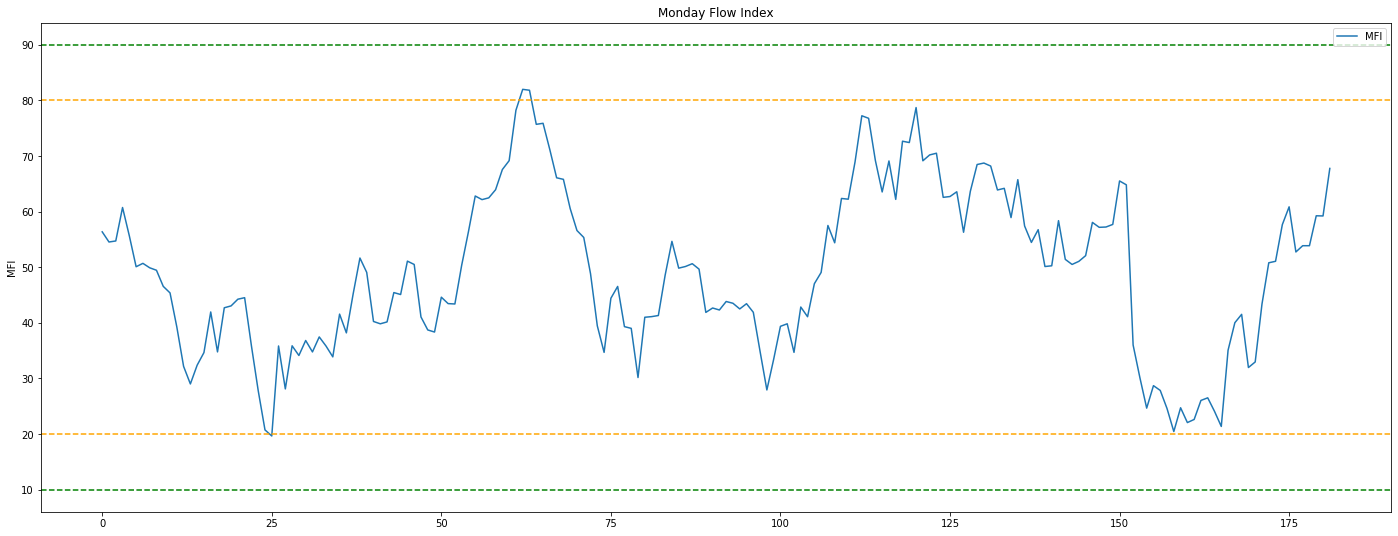

In [32]:
# matplotlib MFI
mfi_df = pd.DataFrame()
mfi_df['MFI'] = mfi
plt.figure(figsize=(24.2,9))
plt.plot(mfi_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(20, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()

In [34]:
# add mfi results to the 1st data frame
full_df  = pd.DataFrame()
full_df = df[period:]
full_df['MFI'] = mfi
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2020-01-23,91.849998,90.160004,91.809998,90.730003,7418400.0,90.000137,56.356728
2020-01-24,91.529999,90.209999,90.849998,90.400002,4218700.0,89.672791,54.528487
2020-01-27,90.000000,88.889999,89.110001,89.589996,4482200.0,88.869301,54.715875
2020-01-28,90.029999,89.389999,89.699997,89.540001,4983700.0,88.819710,60.733510
2020-01-29,90.230003,89.070000,89.610001,89.139999,3914300.0,88.422928,55.633546
...,...,...,...,...,...,...,...
2020-10-05,108.650002,107.180000,107.180000,108.559998,3603400.0,108.559998,53.859210
2020-10-06,108.769997,106.050003,108.559998,106.250000,3992600.0,106.250000,53.862899
2020-10-07,108.180000,106.930000,107.370003,107.739998,4162400.0,107.739998,59.244136


In [35]:
# a simple function to find overbought and oversold points
def get_points(FullDataFrame, high, low):
    buy_signal = []; sell_signal = []

    for i in range(len(FullDataFrame['MFI'])):
        if FullDataFrame['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(FullDataFrame['Close'][i])
        elif FullDataFrame['MFI'][i] < low:
            buy_signal.append(FullDataFrame['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal, sell_signal)


In [36]:
# add over overbought point and oversold points to dataframe
full_df['Buy']= get_points(full_df, 80, 20)[0]
full_df['Sell']= get_points(full_df, 80, 20)[1]
full_df

,High,Low,Open,Close,Volume,Adj Close,MFI,Buy,Sell
Date,,,,,,,,,
2020-01-23,91.849998,90.160004,91.809998,90.730003,7418400.0,90.000137,56.356728,NaN,NaN
2020-01-24,91.529999,90.209999,90.849998,90.400002,4218700.0,89.672791,54.528487,NaN,NaN
2020-01-27,90.000000,88.889999,89.110001,89.589996,4482200.0,88.869301,54.715875,NaN,NaN
2020-01-28,90.029999,89.389999,89.699997,89.540001,4983700.0,88.819710,60.733510,NaN,NaN
2020-01-29,90.230003,89.070000,89.610001,89.139999,3914300.0,88.422928,55.633546,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-10-05,108.650002,107.180000,107.180000,108.559998,3603400.0,108.559998,53.859210,NaN,NaN
2020-10-06,108.769997,106.050003,108.559998,106.250000,3992600.0,106.250000,53.862899,NaN,NaN
2020-10-07,108.180000,106.930000,107.370003,107.739998,4162400.0,107.739998,59.244136,NaN,NaN


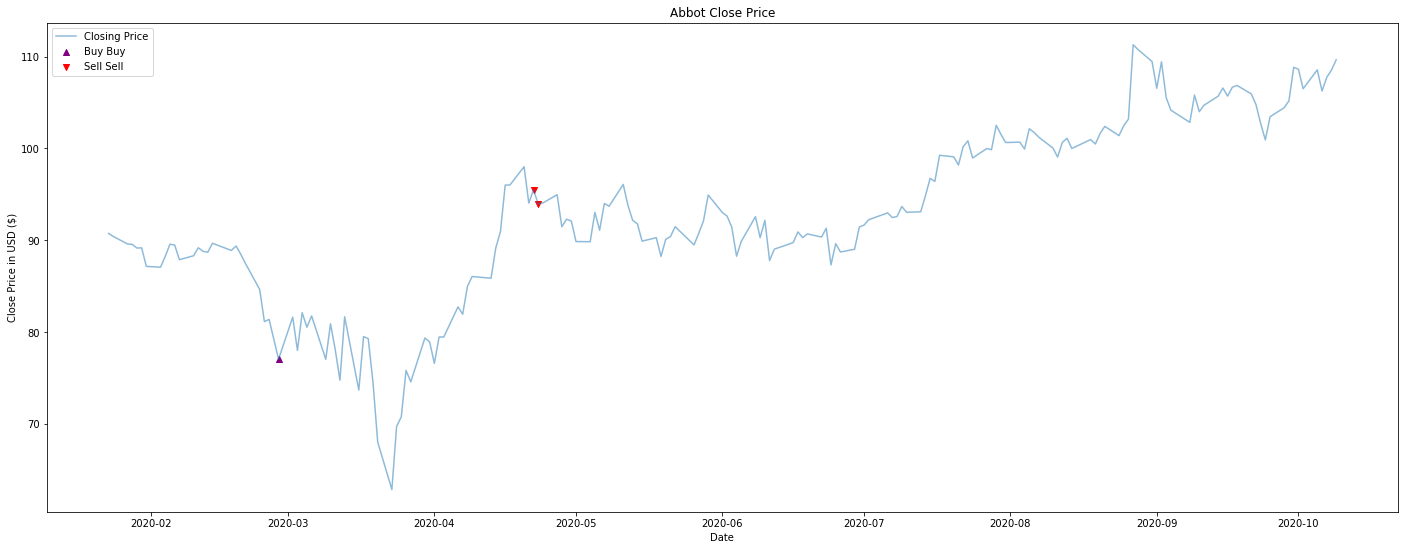

In [38]:
#draw a pretty picture to show the overbougth oversold points on the ohlc plot
plt.figure(figsize=(24.2,9))
plt.plot(full_df['Close'], label = 'Closing Price', alpha = 0.5)
plt.scatter(full_df.index, full_df['Buy'], color = 'purple', label = 'Buy Buy', marker = '^', alpha = 1)
plt.scatter(full_df.index, full_df['Sell'], color = 'red', label = 'Sell Sell', marker = 'v', alpha = 1)
plt.title('Abbot Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

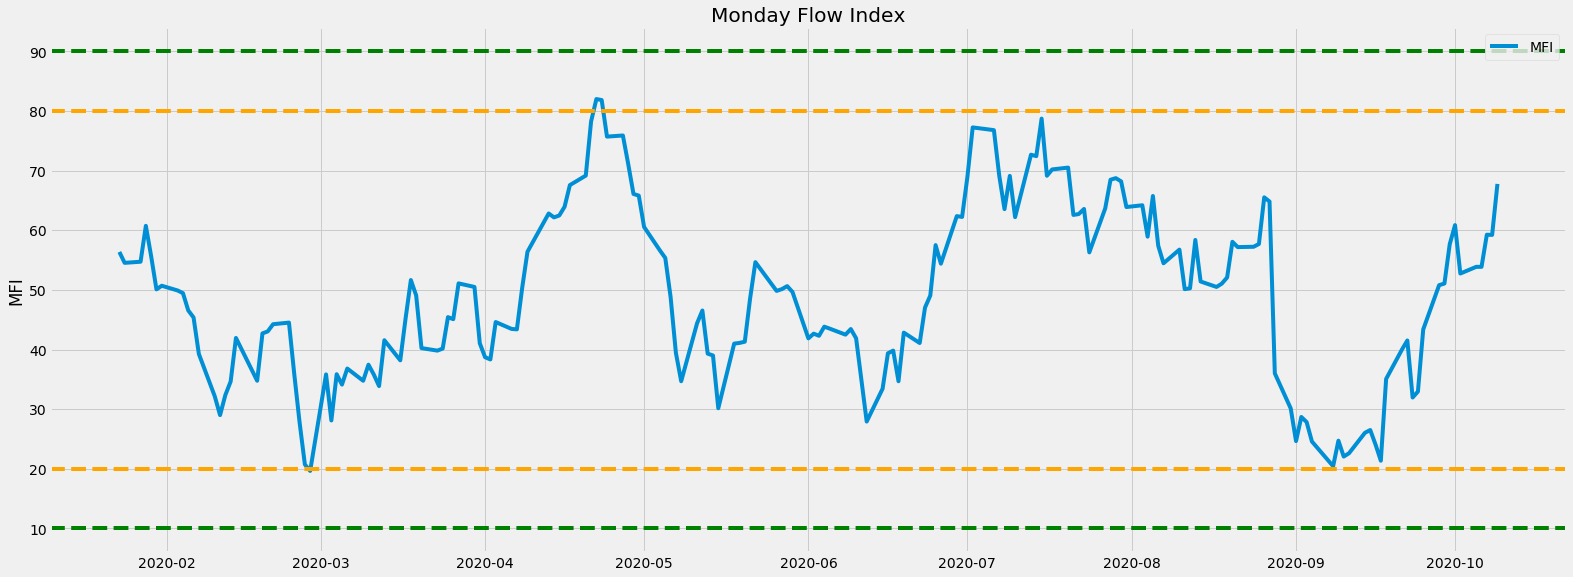

In [41]:
# Add some style to the plot so it's comparable from above plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
plt.plot(full_df['MFI'], label = 'Monday Flow Index')
plt.title('Monday Flow Index')
# plt.xlabel('Date')
plt.ylabel('MFI')
plt.axhline(10, linestyle= '--', color = 'green')
plt.axhline(20, linestyle= '--', color = 'orange')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.axhline(90, linestyle= '--', color = 'green')
plt.legend(mfi_df.columns.values, loc='upper right')
plt.show()
# Reference from https://www.youtube.com/watch?v=tF1Lz4WBQwM